In [1]:
%run _00config.ipynb
%run main_miky1.ipynb
%run main_miky2.ipynb

In [2]:
sns.set_style("darkgrid")

In [3]:
import random
random.seed(42)

## 3. Running the Models

### 3.1 Running Model with only Savers

In [4]:
N_agents = 10
Price = 10
Last_Price = Price
p_savers = 1.
savers_sentiment = 0.70

model = Market_Model_1(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26


In [5]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

<AxesSubplot: >

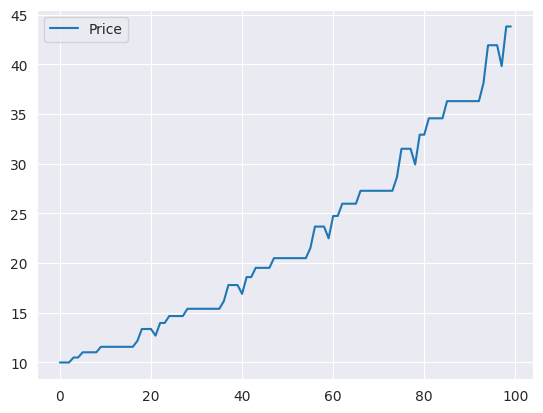

In [6]:
model_vars.plot()

It is observed that since savers are given a periodic behaviour of investing in the same position but with different frequencies then a trivial price trend pattern is a natural result in the direction of savers sentiment, which is a given model parameter.

### 3.2 Running Model with Savers and Random Traders

In [7]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.8
savers_sentiment = 0.70

model = Market_Model_2(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 1091.44
saver_1: 	 $ 920.44
saver_2: 	 $ 919.34
saver_3: 	 $ 968.79
saver_4: 	 $ 1061.43
saver_5: 	 $ 991.88
saver_6: 	 $ 1094.62
saver_7: 	 $ 915.76
saver_8: 	 $ 1065.88
saver_9: 	 $ 1077.09
saver_10: 	 $ 1015.47
saver_11: 	 $ 913.91
saver_12: 	 $ 945.58
saver_13: 	 $ 1097.04
saver_14: 	 $ 946.56
saver_15: 	 $ 976.03
saver_16: 	 $ 1027.14
saver_17: 	 $ 932.53
saver_18: 	 $ 941.9
saver_19: 	 $ 1040.36
saver_20: 	 $ 1029.61
saver_21: 	 $ 1027.0
saver_22: 	 $ 1045.83
saver_23: 	 $ 992.45
rnd_trader_0: 	 $ 439.16
rnd_trader_1: 	 $ 411.2
rnd_trader_2: 	 $ 404.56
rnd_trader_3: 	 $ 414.77
rnd_trader_4: 	 $ 427.43
rnd_trader_5: 	 $ 422.08


In [8]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

<AxesSubplot: >

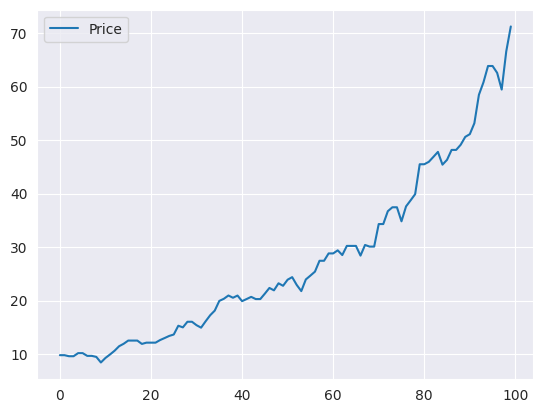

In [9]:
model_vars.plot()

In market with only savers and random traders one must pay attention to the amount of random traders and how much they can afford to exchange, this behaviour is controlled with self.order and p_savers.

Assuming that savers invest more than a random trader, which means that savers influence the price more (self.order for them is higher), it is observed that the price trend given by savers_sentiment persists but with some noise given by random tranders.

If self.order for savers is not high enough one observes that price trend is broken by random price oscillations and in some runs it may even invert the previous trend.

In [10]:
display(agent_vars)
agent_vars.to_csv('agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    saver_7        915.760000      buy      0
     rnd_trader_2   395.560000     sell      1
     saver_1        920.440000      buy      0
     rnd_trader_1   402.200000     sell      1
     saver_10      1015.470000      buy      0
...                        ...      ...    ...
100  saver_16       974.115681      buy      0
     rnd_trader_3 -2181.128030      buy      1
     saver_0        823.663029      buy      5
     saver_5        849.707371      buy      0
     rnd_trader_5 -2173.818030      buy      1

[3000 rows x 3 columns]

### 3.3 Running Model with Savers, Random Traders and Followers

In [11]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.6
p_followers = 0.2
savers_sentiment = 0.70
p_passing_followers = 0.7

model = Market_Model_3(N_agents, Price, p_savers, p_followers, savers_sentiment, p_passing_followers)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 1041.39
saver_1: 	 $ 1071.92
saver_2: 	 $ 1037.48
saver_3: 	 $ 952.91
saver_4: 	 $ 1025.01
saver_5: 	 $ 1060.78
saver_6: 	 $ 985.03
saver_7: 	 $ 944.96
saver_8: 	 $ 1081.68
saver_9: 	 $ 928.45
saver_10: 	 $ 933.18
saver_11: 	 $ 1019.01
saver_12: 	 $ 1013.84
saver_13: 	 $ 987.83
saver_14: 	 $ 1037.74
saver_15: 	 $ 980.5
saver_16: 	 $ 1000.09
saver_17: 	 $ 987.55
follower_0: 	 $ 544.78	 close_thr: 9.3%
follower_1: 	 $ 578.68	 close_thr: 7.5%
follower_2: 	 $ 550.96	 close_thr: 14.6%
follower_3: 	 $ 640.32	 close_thr: 10.8%
follower_4: 	 $ 654.09	 close_thr: 15.0%
follower_5: 	 $ 620.67	 close_thr: 7.7%
rnd_trader_0: 	 $ 363.22
rnd_trader_1: 	 $ 420.5
rnd_trader_2: 	 $ 397.64
rnd_trader_3: 	 $ 412.12
rnd_trader_4: 	 $ 433.29
rnd_trader_5: 	 $ 374.52


In [12]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

<AxesSubplot: >

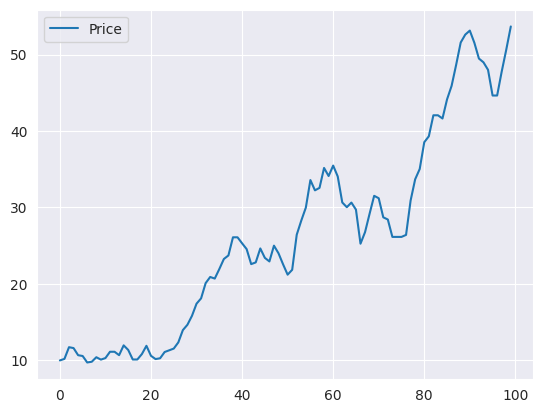

In [13]:
model_vars.plot()

In [14]:
display(agent_vars)
agent_vars.to_csv('agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    follower_0     554.780000     null      0
     saver_13       987.830000     sell      0
     follower_2     560.960000     null      0
     rnd_trader_2   388.640000     sell      1
     saver_15       980.500000     sell      0
...                        ...      ...    ...
100  saver_17       807.125064     sell      0
     saver_12       881.028408      buy      0
     saver_14       880.327260     sell      0
     saver_1       1056.729359      buy      0
     rnd_trader_5 -2105.036855      buy      1

[3000 rows x 3 columns]

### 3.4 Running Model with Savers, Random Traders, Followers and Whales

In [15]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.2
p_followers = 0.1
p_whales = 0.05
savers_sentiment = 0.70
p_passing_followers = 0.7
p_passing_whales = 0.5

model = Market_Model_4(N_agents, Price, p_savers, p_followers, p_whales, savers_sentiment, p_passing_followers, p_passing_whales)

N_steps = 730
for i in range(N_steps):
    model.step()

saver_0: 	 $ 1089.89
saver_1: 	 $ 1021.02
saver_2: 	 $ 989.98
saver_3: 	 $ 974.4
saver_4: 	 $ 915.38
saver_5: 	 $ 1005.89
saver_6: 	 $ 962.88
saver_7: 	 $ 949.92
follower_0: 	 $ 543.11	 close_thr: 6.9%
follower_1: 	 $ 602.13	 close_thr: 14.1%
follower_2: 	 $ 554.13	 close_thr: 12.7%
follower_3: 	 $ 624.48	 close_thr: 7.1%
whale_0: 	 $ 10223.75	 close_thr: 103.9%	 WLT: 	10
whale_1: 	 $ 10997.26	 close_thr: 94.0%	 WLT: 	10
rnd_trader_0: 	 $ 370.86
rnd_trader_1: 	 $ 365.92
rnd_trader_2: 	 $ 373.81
rnd_trader_3: 	 $ 417.07
rnd_trader_4: 	 $ 439.78
rnd_trader_5: 	 $ 424.84
rnd_trader_6: 	 $ 437.4
rnd_trader_7: 	 $ 438.93
rnd_trader_8: 	 $ 413.43
rnd_trader_9: 	 $ 416.76
rnd_trader_10: 	 $ 404.0
rnd_trader_11: 	 $ 383.23
rnd_trader_12: 	 $ 384.0
rnd_trader_13: 	 $ 372.6
rnd_trader_14: 	 $ 416.77
rnd_trader_15: 	 $ 416.02
rnd_trader_16: 	 $ 373.93
rnd_trader_17: 	 $ 388.92
rnd_trader_18: 	 $ 377.94
rnd_trader_19: 	 $ 438.81
rnd_trader_20: 	 $ 423.37
rnd_trader_21: 	 $ 378.94
rnd_trader_22: 	 

In [16]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

<AxesSubplot: >

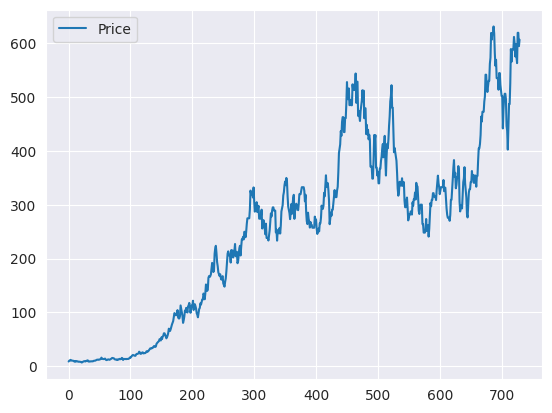

In [17]:
model_vars.plot()

In [18]:
model_vars.to_csv('model_vars.csv')

In a market simulation, if the main objective is to observe a pretty realistic chart, then one should keep high the percentage of random traders.

Instead if one wants to capture the noiseless trend given by savers, followers and whales effects on price dynamics the percentage of random traders should be kept small.

## 3.5 Simulation Returns

In [19]:
display(model_vars['Price'])

0        9.000000
1       10.440000
2       10.962000
3       12.058200
4       10.731798
          ...    
725    562.735776
726    619.009353
727    619.009353
728    594.248979
729    606.133959
Name: Price, Length: 730, dtype: float64

In [20]:
# s_ret: simulated returns
s_ret = np.log(model_vars['Price'] / model_vars['Price'].shift(1)).dropna()

In [21]:
display(s_ret)

1      0.148420
2      0.048790
3      0.095310
4     -0.116534
5      0.009950
         ...   
725   -0.020203
726    0.095310
727    0.000000
728   -0.040822
729    0.019803
Name: Price, Length: 729, dtype: float64

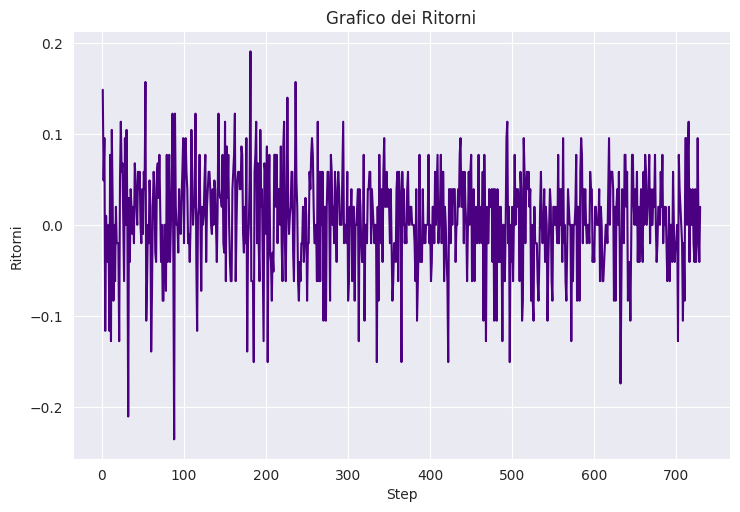

In [22]:
sns.relplot(
    data = s_ret, kind = "line",
    height = 5, aspect = 1.5, color = "indigo"
)
plt.title('Grafico dei Ritorni')
plt.ylabel('Ritorni')
plt.xlabel('Step');

### 3.6 Real Market Returns

In [23]:
import yfinance as yf

In [24]:
ticker = ['BTC-USD']
data = yf.download(ticker, start = '2017-01-01', end = '2017-12-01', period = 'max').reset_index(drop=True)

[*********************100%***********************]  1 of 1 completed


In [25]:
data = data['Close'].drop(columns = ['Date'], axis = 1)

In [26]:
print(data)

0        998.325012
1       1021.750000
2       1043.839966
3       1154.729980
4       1013.380005
           ...     
329     9330.549805
330     9818.349609
331    10058.799805
332     9888.610352
333    10233.599609
Name: Close, Length: 334, dtype: float64


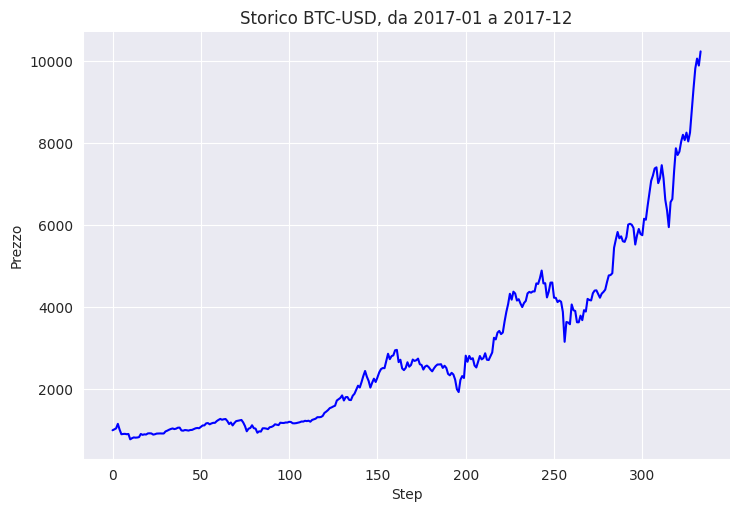

In [27]:
sns.relplot(
    data = data, kind = "line",
    height = 5, aspect = 1.5, color = "blue"
)
plt.title('Storico BTC-USD, da 2017-01 a 2017-12')
plt.ylabel('Prezzo')
plt.xlabel('Step');

In [28]:
r_ret = np.log(data / data.shift(1)).dropna()

In [29]:
print(r_ret)

1      0.023193
2      0.021389
3      0.100960
4     -0.130575
5     -0.116209
         ...   
329    0.059575
330    0.050959
331    0.024195
332   -0.017064
333    0.034293
Name: Close, Length: 333, dtype: float64


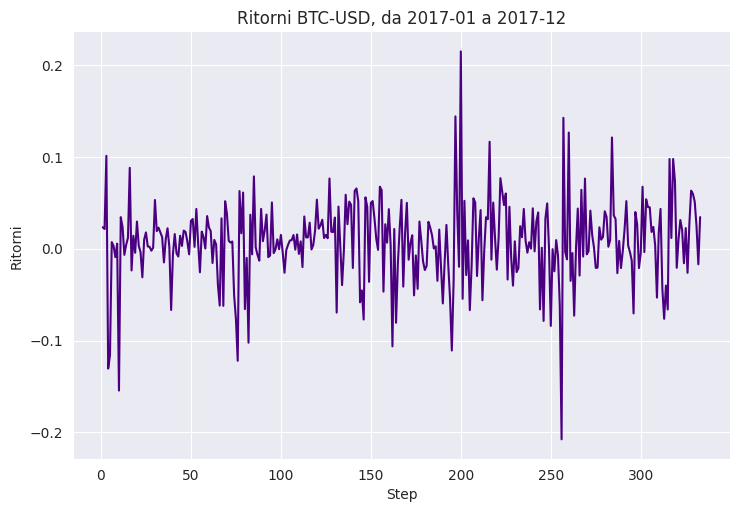

In [30]:
sns.relplot(
    data = r_ret, kind = "line",
    height = 5, aspect = 1.5, color = "indigo"
)
plt.title('Ritorni BTC-USD, da 2017-01 a 2017-12')
plt.ylabel('Ritorni')
plt.xlabel('Step');

### 3.7 Plot simulation results over real market
For both dataframes the step value is simply in the index column.

In [31]:
display(data.index)
display(model_vars.index)

RangeIndex(start=0, stop=334, step=1)

RangeIndex(start=0, stop=730, step=1)

In [32]:
display(len(s_ret))
display(len(r_ret))

729

333

In [33]:
# consider a starting index in the real market
start = 15

# get the price at that index
print(data.values[start])
Price = data.values[start]

831.5339965820312


In [34]:
r_ret = np.log(data / data.shift(1))

pred_prices = list()

for n in range(start):
    pred_prices.append(np.nan)

for ret in s_ret:
    pred_prices.append(np.exp(ret) * Price)
    Price = pred_prices[-1]

In [35]:
print(pred_prices[0:20])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 964.5794360351562, 1012.8084078369141, 1114.0892486206053, 991.5394312723388, 1001.4548255850622]


In [36]:
true_prices = data.tolist()

In [37]:
df = pd.DataFrame(data = zip(true_prices, pred_prices), columns = ['true', 'pred'])

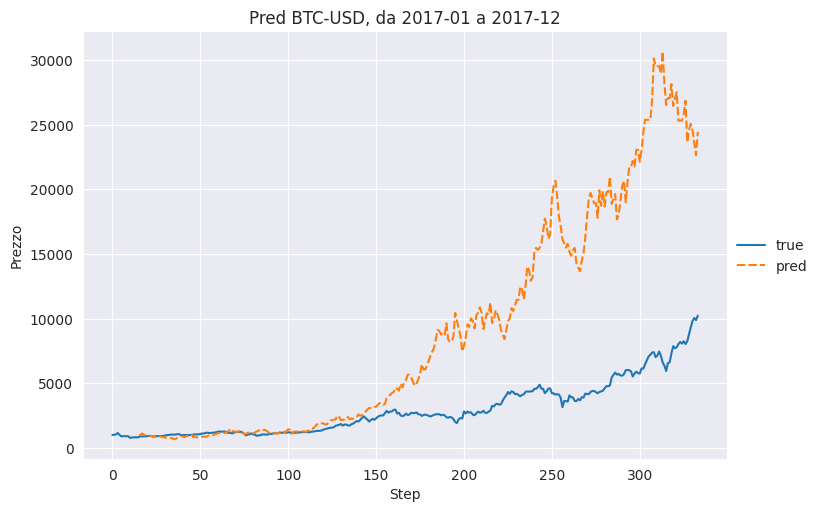

In [38]:
sns.relplot(
    data = df, kind = "line",
    height = 5, aspect = 1.5, color = "orange"
)
plt.title('Pred BTC-USD, da 2017-01 a 2017-12')
plt.ylabel('Prezzo')
plt.xlabel('Step');